In [1]:
import pandas as pd
import numpy as np
import swifter
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import operator
import data_prep_final as d
import functions as f
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [72]:
X, y = d.clean()

Upload
y_clean
null_value_drop
reset_indices
column_drop
x_clean
values_lower
column_lowercase
categorize_all



diagnoses_1_3



diagnoses_2_3



diagnoses_3_3



number_meds



num_down



num_up



X_dummy_variables


In [29]:
def outlier_reduction(x_val):
    """Manipulate continuous data to lessen the result of outliers prior to standardization"""
    log_columns = ['time_in_hospital', 'num_lab_procedures', 'num_medications']
    for column in log_columns:
        x_val[f'{column}_log'] = np.log(x_val[column])
    x_val = x_val.drop(columns = log_columns)
    

In [74]:
column_list = list(X.columns)
for column in column_list:
    print(X[column].value_counts())

1    36305
0    31825
Name: female, dtype: int64
5    17297
4    15267
3    12033
6    10812
2     6635
1     2620
0     1762
7     1704
Name: age, dtype: int64
3     12147
2     11862
1     10186
4      9174
5      6532
6      4911
7      3798
8      2778
9      1859
10     1467
11     1156
12      896
13      742
14      622
Name: time_in_hospital, dtype: int64
1      2202
43     1817
44     1595
45     1553
38     1481
46     1478
47     1456
40     1428
39     1390
41     1383
37     1383
42     1354
48     1346
49     1330
35     1283
51     1268
50     1261
36     1251
54     1225
55     1212
52     1185
56     1174
53     1166
57     1166
58     1119
59     1091
34     1081
61     1068
60     1033
62     1002
63      943
32      921
31      914
29      911
30      899
33      882
64      866
65      860
66      812
67      762
2       758
26      756
28      736
25      714
68      697
19      695
9       670
69      653
23      584
27      571
10      570
20      566
70      55

In [3]:
cont_columns = ['time_in_hospital', 'num_lab_procedures',
                'num_procedures', 'num_medications', 'outpatient',
                'emergency', 'inpatient', 'number_diagnoses', 'icd_1',
                'icd_2', 'icd_3', 'icd_4', 'icd_5', 'icd_6', 'icd_7',
                'icd_8', 'icd_9', 'icd_10', 'icd_11', 'icd_12', 'icd_13',
                'icd_14', 'icd_16', 'icd_17', 'icd_18', 'icd_19', 'num_meds',
                'num_down', 'num_up']

In [8]:
X2 = X

In [76]:
X2['num_medications_log'] = np.log(X2.num_medications)

In [61]:
X2['outpatient_binned'] = X2.outpatient.swifter.apply(lambda x: 0 if x==0 else (1 if x==1 else (2 if 2<=x<=3 else 3)))

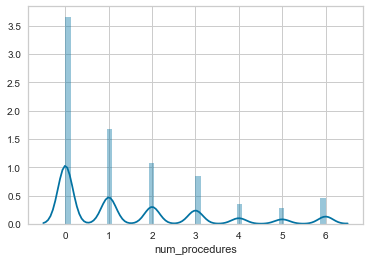

In [78]:
sns.distplot(X2.num_procedures)

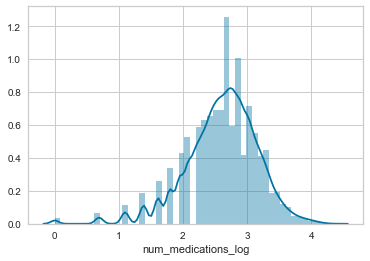

In [77]:
sns.distplot(X2.num_medications_log)

In [4]:
X_cont = X[cont_columns]
X_cat = X.drop(columns=cont_columns)

In [6]:
X_cont.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,outpatient,emergency,inpatient,number_diagnoses,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up
0,13,68,2,28,0,0,0,8,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1,12,33,3,18,0,0,0,8,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0
2,1,51,0,8,0,0,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,9,47,2,17,0,0,0,9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3,31,6,16,0,0,0,9,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
scaler = MinMaxScaler()
scaler.fit_transform(X_cont)

array([[0.92307692, 0.51145038, 0.33333333, ..., 0.4       , 0.        ,
        0.        ],
       [0.84615385, 0.24427481, 0.5       , ..., 0.4       , 0.        ,
        0.        ],
       [0.        , 0.38167939, 0.        , ..., 0.4       , 0.        ,
        0.        ],
       ...,
       [0.07692308, 0.34351145, 1.        , ..., 0.2       , 0.        ,
        0.        ],
       [0.30769231, 0.57251908, 0.16666667, ..., 0.2       , 0.        ,
        0.33333333],
       [0.38461538, 0.09160305, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
X2['lab_binned'] = pd.qcut(X2['num_lab_procedures'], 20, labels=False)
print(X2['lab_binned'].value_counts())

8     4165
11    4132
4     4031
6     3917
2     3602
13    3576
1     3563
14    3552
0     3457
18    3426
9     3412
19    3376
17    3300
15    3243
3     3050
10    3031
16    3013
5     2884
7     2871
12    2529
Name: lab_binned, dtype: int64


In [33]:
sns.distplot(X[column])
plt.show()

1      2202
43     1817
44     1595
45     1553
38     1481
46     1478
47     1456
40     1428
39     1390
41     1383
37     1383
42     1354
48     1346
49     1330
35     1283
51     1268
50     1261
36     1251
54     1225
55     1212
52     1185
56     1174
53     1166
57     1166
58     1119
59     1091
34     1081
61     1068
60     1033
62     1002
63      943
32      921
31      914
29      911
30      899
33      882
64      866
65      860
66      812
67      762
2       758
26      756
28      736
25      714
68      697
19      695
9       670
69      653
23      584
27      571
10      570
20      566
70      558
71      543
21      527
72      524
24      508
3       497
22      488
18      475
17      467
11      467
73      451
74      411
12      361
16      354
75      352
76      325
77      304
13      288
4       287
15      265
8       258
7       255
14      253
78      236
79      219
5       210
80      204
6       197
81      186
83      154
82      148
84  

female


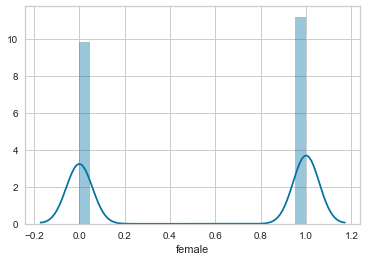

age


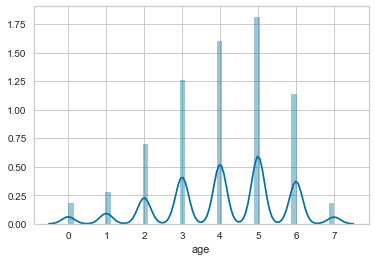

time_in_hospital


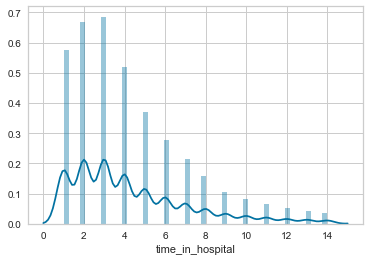

num_lab_procedures


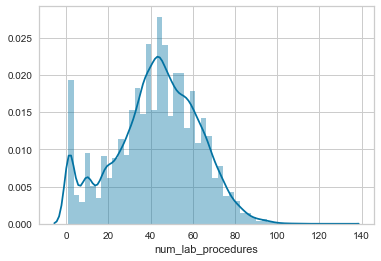

num_procedures


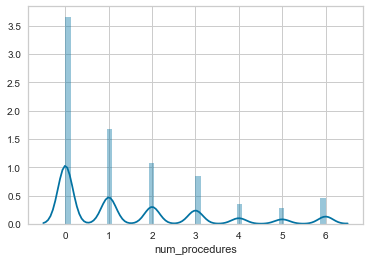

num_medications


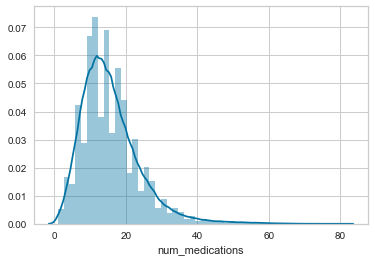

outpatient


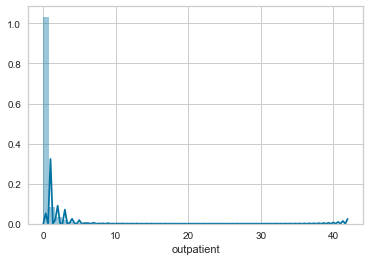

emergency


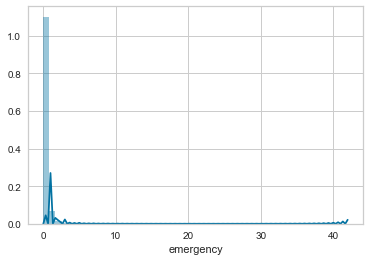

inpatient


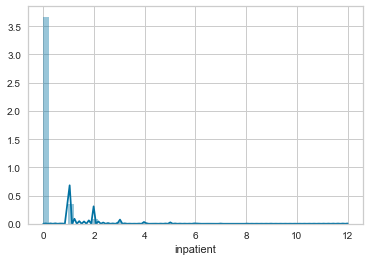

number_diagnoses


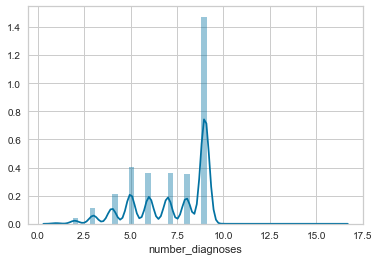

max_glu_serum


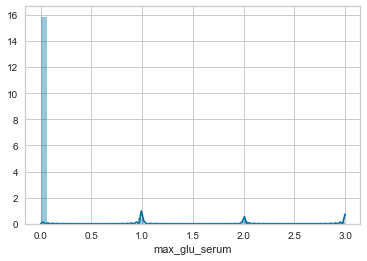

a1cresult


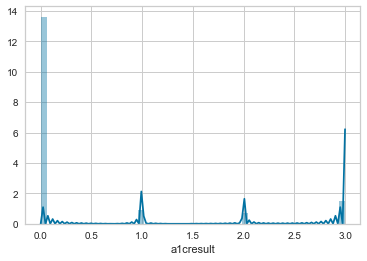

change


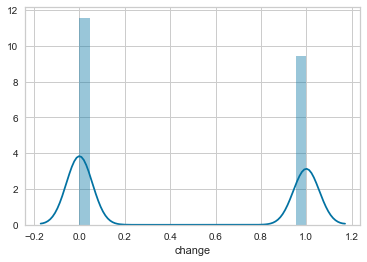

diabetesmed


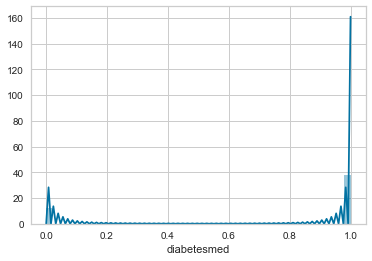

icd_1


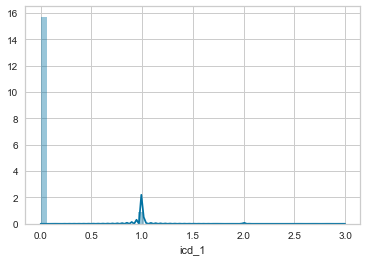

icd_2


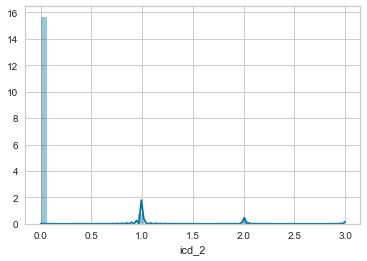

icd_3


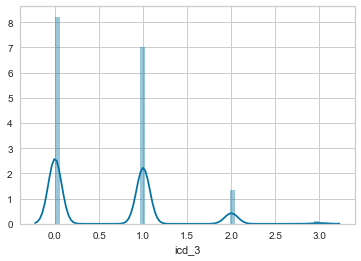

icd_4


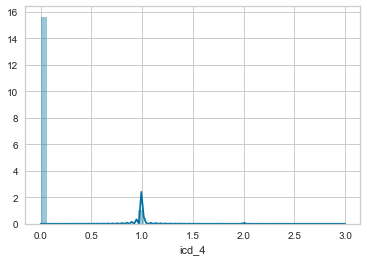

icd_5


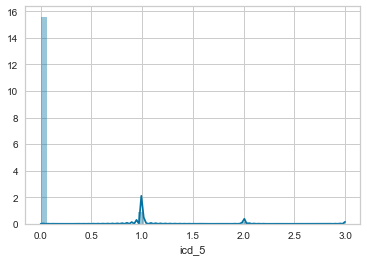

icd_6


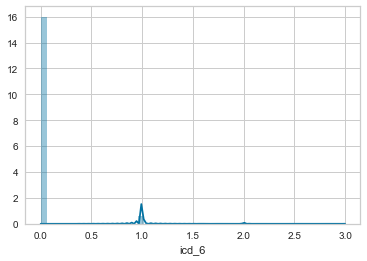

icd_7


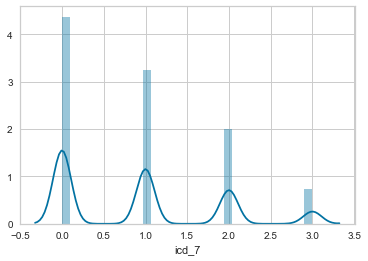

icd_8


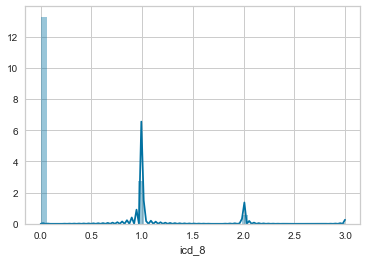

icd_9


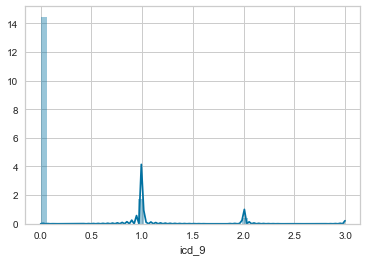

icd_10


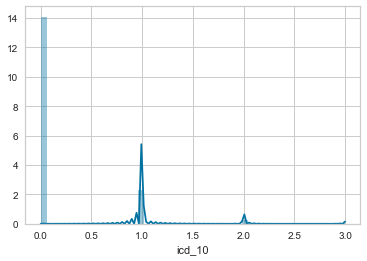

icd_11


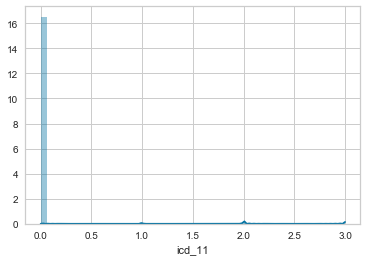

icd_12


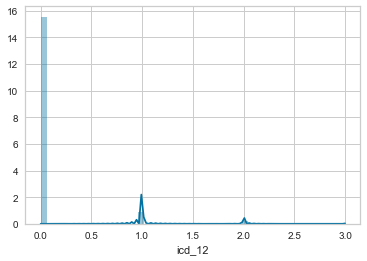

icd_13


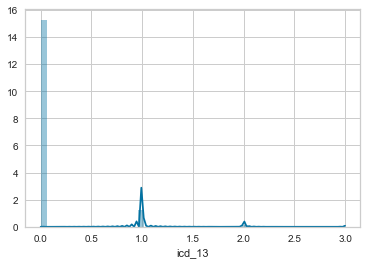

icd_14


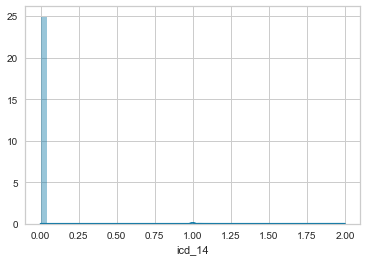

icd_16


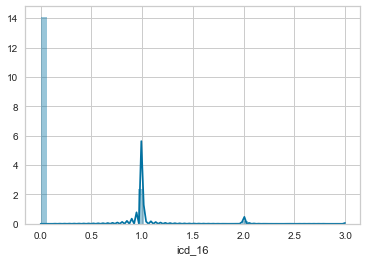

icd_17


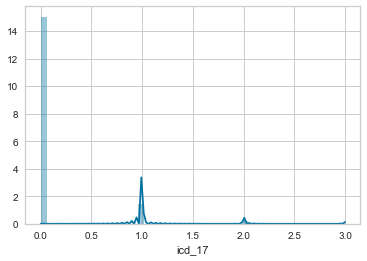

icd_18


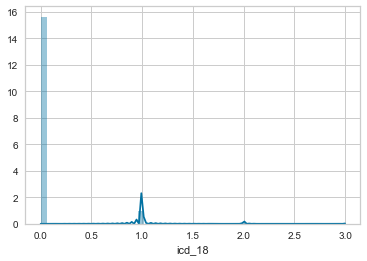

icd_19


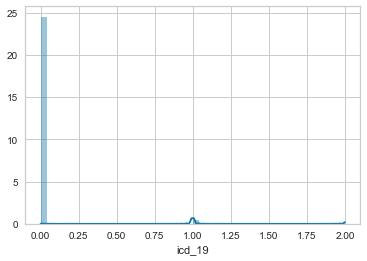

num_meds


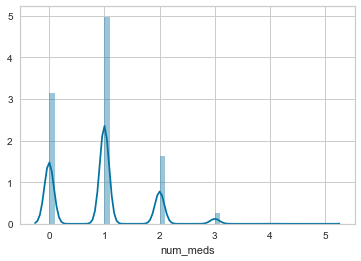

num_down


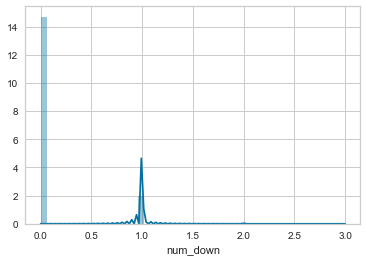

num_up


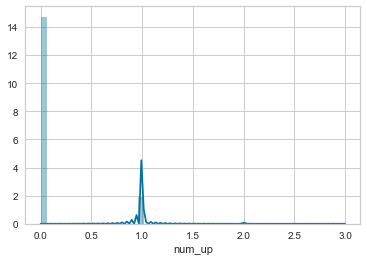

race_black


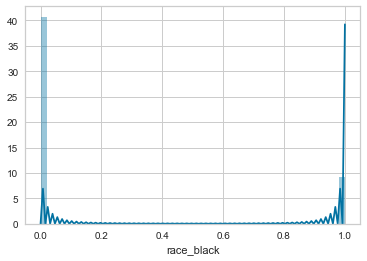

race_other


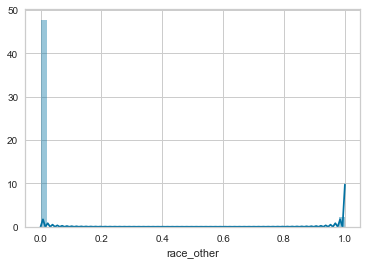

at_not_urgent


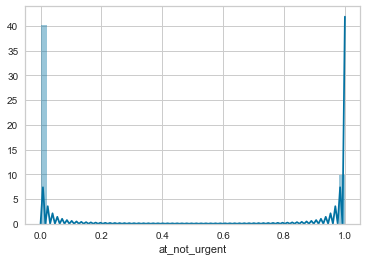

at_urgent


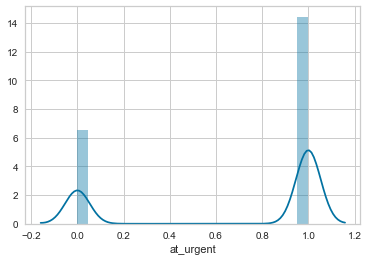

dd_care


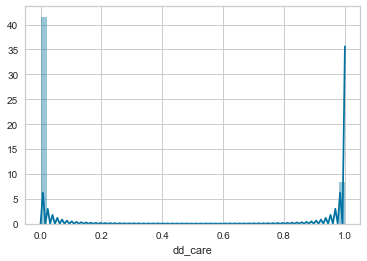

dd_care_home


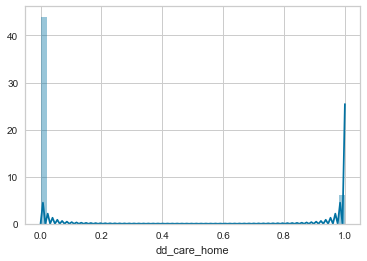

dd_care_lt


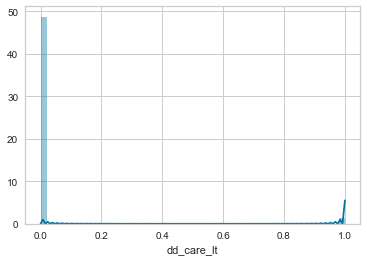

dd_home


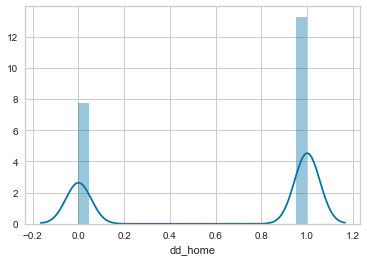

dd_other


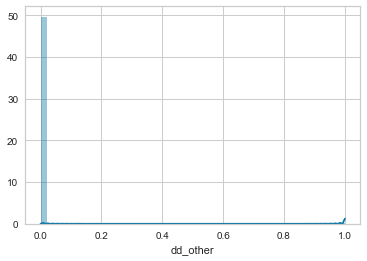

no_info


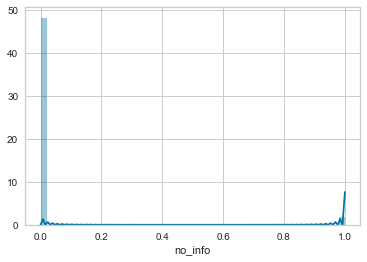

as_referral


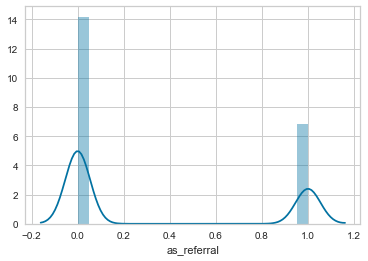

as_transfer_er


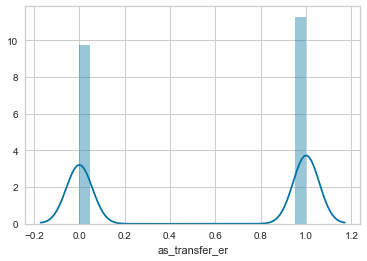

as_transfer_other


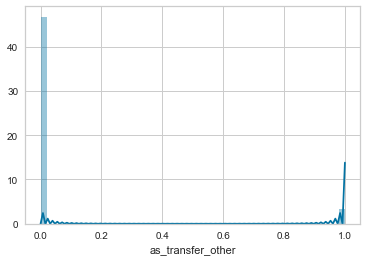

metformin_down


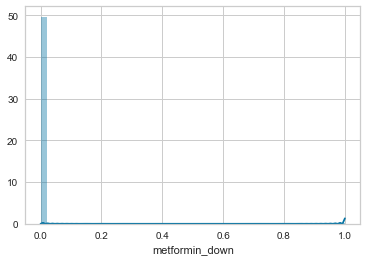

metformin_steady


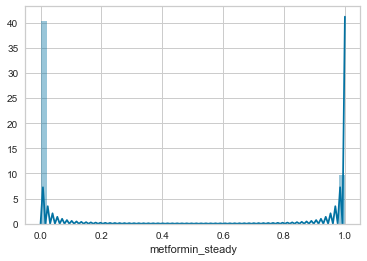

metformin_up


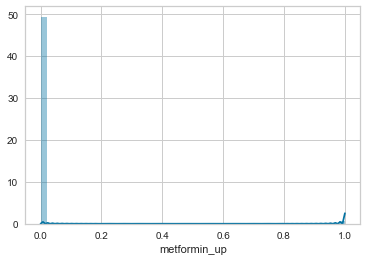

repaglinide_down


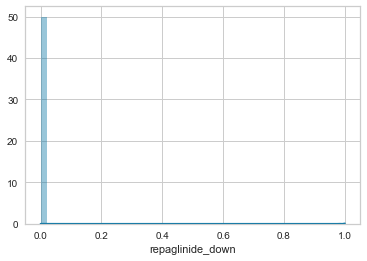

repaglinide_steady


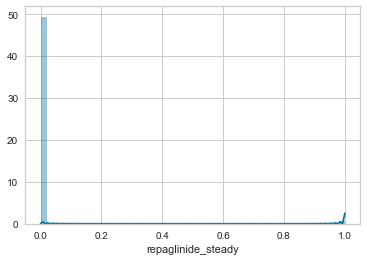

repaglinide_up


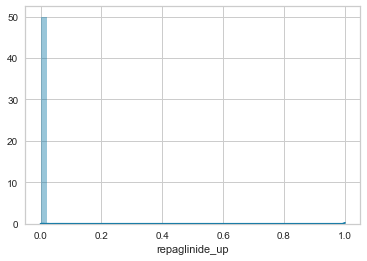

glimepiride_down


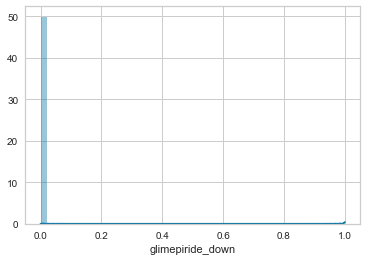

glimepiride_steady


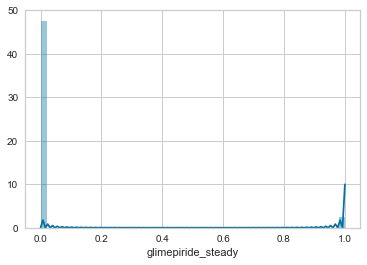

glimepiride_up


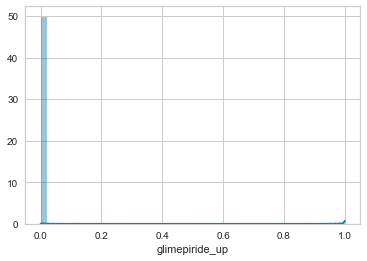

glipizide_down


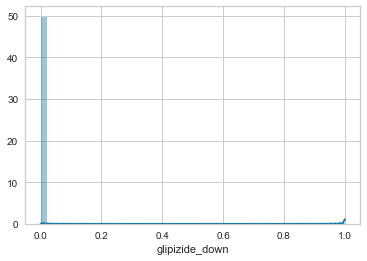

glipizide_steady


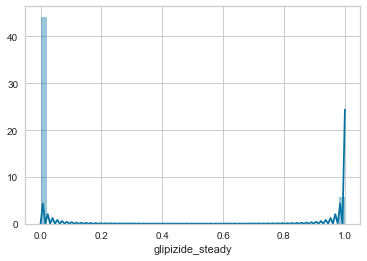

glipizide_up


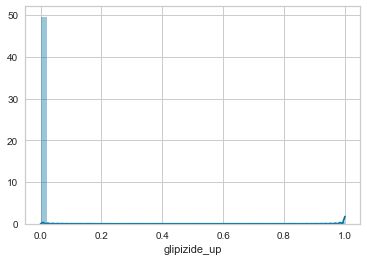

glyburide_down


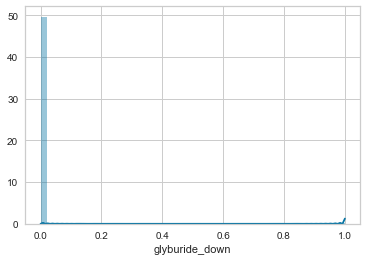

glyburide_steady


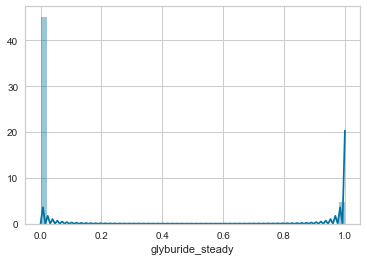

glyburide_up


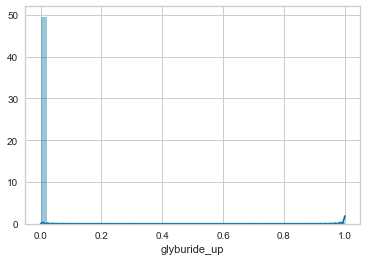

pioglitazone_down


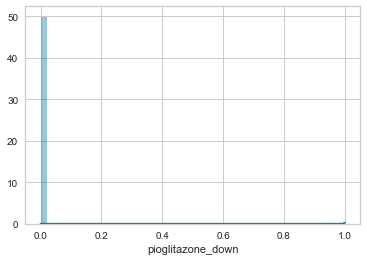

pioglitazone_steady


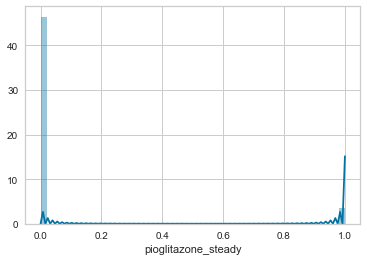

pioglitazone_up


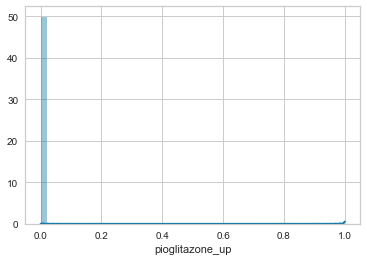

rosiglitazone_down


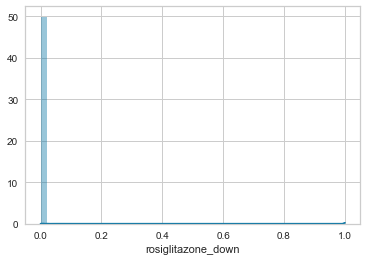

rosiglitazone_steady


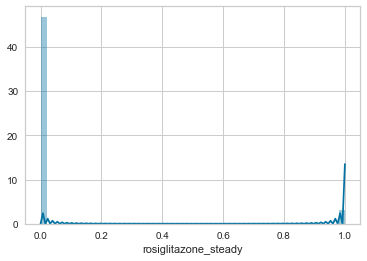

rosiglitazone_up


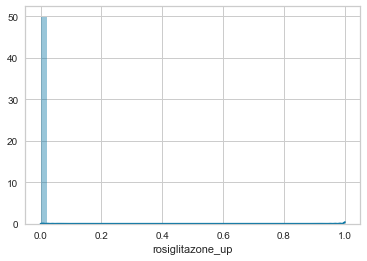

insulin_down


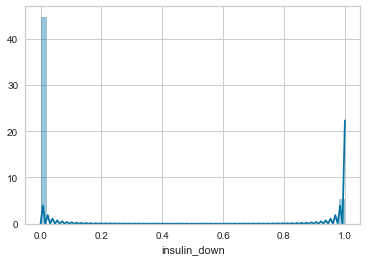

insulin_steady


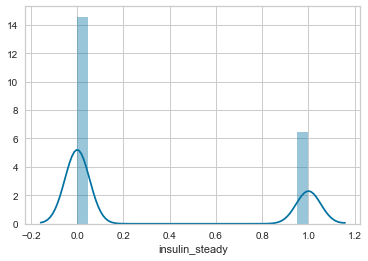

insulin_up


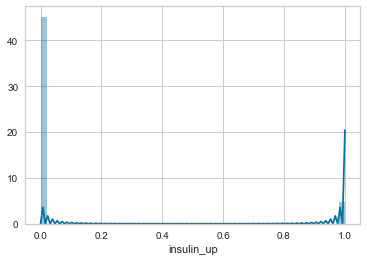

In [32]:
for column in column_list:
    print(column)
    sns.distplot(X[column])
    plt.show()

In [17]:
X['max_glu_serum'] = X.max_glu_serum.replace({'None': 0, 'Norm': 1, '>200': 1, '>300': 1})

In [18]:
X.max_glu_serum.value_counts()

0    64823
1     3307
Name: max_glu_serum, dtype: int64

In [22]:
sns.pairplot(X)
plt.show()

ValueError: color kwarg must have one color per data set. 68130 data sets and 1 colors were provided

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002C2EC80A950> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002C2EC8DE7B8> (for post_execute):


KeyboardInterrupt: 

In [10]:
X.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [11]:
X.max_glu_serum.value_counts()

None    94201
Norm     2571
>200     1466
>300     1253
Name: max_glu_serum, dtype: int64

In [70]:
X, y  = d.clean_5_5(X, y)

Upload
y_clean
column_drop
null_value_drop
x_clean
values_lower
column_lowercase


C:\Users\Rocio\Desktop\Class_files\Projects\mod_5_project\Hospital_Readmittance_Rates_Diabetes\data_prep_1.py:283: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  y_2.to_csv('./data/y_cleaned.csv', index=None)


NameError: name 'X_11' is not defined

In [132]:
col_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
            'miglitol', 'troglitazone', 'tolazamide', 'insulin',
            'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [133]:
for col in col_list:
    X[f"{col}_use"] = X[col].swifter.apply(
            lambda x: 0 if x == 'no' else 1)
    X['num_meds'] = X.iloc[:, 63:84].sum(axis=1)

In [142]:
for col in col_list:
    X[f"{col}_down"] = X[col].swifter.apply(
        lambda x: 1 if x == 'down' else 0)

In [136]:
X = X.drop(columns=['metformin_use', 'repaglinide_use', 'nateglinide_use',
                    'chlorpropamide_use', 'glimepiride_use', 'acetohexamide_use',
                    'glipizide_use', 'glyburide_use', 'tolbutamide_use',
                    'pioglitazone_use', 'rosiglitazone_use', 'acarbose_use',
                    'miglitol_use', 'troglitazone_use', 'tolazamide_use',
                    'insulin_use', 'glyburide-metformin_use',
                    'glipizide-metformin_use', 'glimepiride-pioglitazone_use',
                    'metformin-pioglitazone_use'])

In [144]:
X['num_down'] = X.iloc[:, 64:].sum(axis=1)

In [145]:
X.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,metformin_down,repaglinide_down,nateglinide_down,chlorpropamide_down,glimepiride_down,acetohexamide_down,glipizide_down,glyburide_down,tolbutamide_down,pioglitazone_down,rosiglitazone_down,acarbose_down,miglitol_down,troglitazone_down,tolazamide_down,insulin_down,glyburide-metformin_down,glipizide-metformin_down,glimepiride-pioglitazone_down,metformin-pioglitazone_down,num_down
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,caucasian,female,1,6,25,1,1,41,0,1,0,0,0,250.83,0.00,0.0,1,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,55629189,caucasian,female,2,1,1,7,3,59,0,18,0,0,0,276.00,250.01,255.0,9,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64410,86047875,african_american,female,3,1,1,7,2,11,5,13,2,0,1,648.00,250.00,1027.0,6,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
500364,82442376,caucasian,male,4,1,1,7,2,44,1,16,0,0,0,8.00,250.43,403.0,7,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16680,42519267,caucasian,male,5,1,1,7,1,51,0,8,0,0,0,197.00,157.00,250.0,5,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
X['num_meds'] = X.iloc[:, 63:84].sum(axis=1)

In [148]:
X = X.drop(columns=['metformin_down', 'repaglinide_down', 'nateglinide_down',
                    'chlorpropamide_down', 'glimepiride_down', 'acetohexamide_down',
                    'glipizide_down', 'glyburide_down', 'tolbutamide_down',
                    'pioglitazone_down', 'rosiglitazone_down', 'acarbose_down',
                    'miglitol_down', 'troglitazone_down', 'tolazamide_down', 'insulin_down',
                    'glyburide-metformin_down', 'glipizide-metformin_down',
                    'glimepiride-pioglitazone_down', 'metformin-pioglitazone_down'])

In [122]:
X.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesmed', 'icd_1', 'icd_2', 'icd_3', 'icd_4', 'icd_5', 'icd_6',
       'icd_7', 'icd_8', 'icd_9', 'icd_10', 'icd_11', 'icd_12', 'icd_13',
       'icd_14', 'icd_15', 'icd_16', 'icd_17', 'icd_18', 'icd_19',
       'metformin_use', 'num_meds', 're

In [149]:
def num_up(data, col_list):
    """Creates column with number of medications increased"""
    for col in col_list:
        data[f"{col}_up"] = data[col].swifter.apply(lambda x: 1 if x == 'up' else 0)
    data['num_up'] = data.iloc[:, 66:].sum(axis=1)
    data = data.drop(columns=['metformin_up', 'repaglinide_up',
                          'nateglinide_up', 'chlorpropamide_up', 'glimepiride_up',
                          'acetohexamide_up', 'glipizide_up', 'glyburide_up', 'tolbutamide_up',
                          'pioglitazone_up', 'rosiglitazone_up', 'acarbose_up', 'miglitol_up',
                          'troglitazone_up', 'tolazamide_up', 'insulin_up',
                          'glyburide-metformin_up', 'glipizide-metformin_up',
                          'glimepiride-pioglitazone_up', 'metformin-pioglitazone_up'])
    return data

In [151]:
X = num_up(X, col_list)

In [106]:
X = X.drop(columns = ['repaglinide_use', 'nateglinide_use',
       'chlorpropamide_use', 'glimepiride_use', 'acetohexamide_use',
       'glipizide_use', 'glyburide_use', 'tolbutamide_use', 'pioglitazone_use',
       'rosiglitazone_use', 'acarbose_use', 'miglitol_use', 'troglitazone_use',
       'tolazamide_use', 'insulin_use', 'glyburide-metformin_use',
       'glipizide-metformin_use', 'glimepiride-pioglitazone_use',
       'metformin-pioglitazone_use'])

In [155]:
X_index = list(X.index)
y = y.loc[y.index.isin(X_index) == True]

In [152]:
X.shape

(99491, 64)

In [153]:
y.shape

(101766,)

In [48]:
cleaned_data = pd.concat([X, y], axis=1)

In [21]:
cleaned_data.to_csv('./data/cleaned_data')

In [20]:
y.head()

encounter_id
2278392              no
149190     over_30_days
64410                no
500364               no
16680                no
Name: readmitted, dtype: object

In [8]:
y = pd.read_csv('data/y_cleaned.csv')

In [9]:
y.head()

,no
0,over_30_days
1,no
2,no
3,no
4,over_30_days


In [10]:
diabetes = pd.read_csv('data/diabetic_data.csv')

In [12]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
X2 = X

In [9]:
y2 = y

In [24]:
X2.shape

(99491, 63)

In [25]:
y2.shape

(99491,)

In [26]:
X2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,icd_1,icd_2,icd_3,icd_4,icd_5,icd_6,icd_7,icd_8,icd_9,icd_10,icd_11,icd_12,icd_13,icd_14,icd_15,icd_16,icd_17,icd_18,icd_19,num_meds,num_down,num_up
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,caucasian,female,1,6,25,1,1,41,0,1,0,0,0,250.83,0.00,0.0,1,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149190,caucasian,female,2,1,1,7,3,59,0,18,0,0,0,276.00,250.01,255.0,9,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
64410,african_american,female,3,1,1,7,2,11,5,13,2,0,1,648.00,250.00,1027.0,6,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
500364,caucasian,male,4,1,1,7,2,44,1,16,0,0,0,8.00,250.43,403.0,7,none,none,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,up,no,no,no,no,ch,yes,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
16680,caucasian,male,5,1,1,7,1,51,0,8,0,0,0,197.00,157.00,250.0,5,none,none,no,no,no,no,no,no,steady,no,no,no,no,no,no,no,no,steady,no,no,no,no,ch,yes,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0


In [27]:
y2.value_counts()

no               53315
over_30_days     35007
under_30_days    11169
Name: readmitted, dtype: int64

In [28]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [156]:
X['gender'] = X.gender.replace({'female': '1', 'male': '0'})
X = X.rename(columns = {'gender': 'female'})

X_race = pd.get_dummies(X.race, drop_first=False)
X = pd.concat([X, X_race], axis=1, ignore_index=False)
X = X.drop(columns = ['race', 'caucasian'])

X = X.drop(columns = ['admission_source_id', 'diag_1', 'diag_2', 'diag_3'])

X_glucose = pd.get_dummies(X['max_glu_serum'], drop_first=False)
X = pd.concat([X, X_glucose], axis=1, ignore_index=False)
X = X.rename(columns={'200_to_300': 'glu_200_300',
                        'more_than_300': 'glu_over_300', 'norm': 'glu_norm'})
X = X.drop(columns = ['none', 'max_glu_serum'])

X_a1 = pd.get_dummies(X['a1cresult'], drop_first=False)
X = pd.concat([X, X_a1], axis=1, ignore_index=False)

X = X.rename(columns={'7_to_8': 'a1_7_8',
                        'over_8': 'al_over_8', 'norm': 'a1_norm'})
X = X.drop(columns = ['none', 'a1cresult'])

X = X.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide',
                    'tolbutamide', 'acarbose', 'miglitol', 'troglitazone',
                    'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-pioglitazone'])

X_metformin = pd.get_dummies(X['metformin'], drop_first=False)
X = pd.concat([X, X_metformin], axis=1, ignore_index=False)

X = X.rename(columns={'down': 'metformin_down',
                        'steady': 'metformin_steady', 'up': 'metformin_up'})
X = X.drop(columns = ['no', 'metformin'])

X_repaglinide = pd.get_dummies(X['repaglinide'], drop_first=False)
X = pd.concat([X, X_repaglinide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'repaglinide_down',
                        'steady': 'repaglinide_steady', 'up': 'repaglinide_up'})
X = X.drop(columns = ['no', 'repaglinide'])

X_glimepiride = pd.get_dummies(X['glimepiride'], drop_first=False)
X = pd.concat([X, X_glimepiride], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glimepiride_down',
                        'steady': 'glimepiride_steady', 'up': 'glimepiride_up'})
X = X.drop(columns = ['no', 'glimepiride'])

X_glipizide = pd.get_dummies(X['glipizide'], drop_first=False)
X = pd.concat([X, X_glipizide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glipizide_down',
                        'steady': 'glipizide_steady', 'up': 'glipizide_up'})
X = X.drop(columns = ['no', 'glipizide'])

X_glyburide = pd.get_dummies(X['glyburide'], drop_first=False)
X = pd.concat([X, X_glyburide], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'glyburide_down',
                        'steady': 'glyburide_steady', 'up': 'glyburide_up'})
X = X.drop(columns = ['no', 'glyburide'])

X_pioglitazone = pd.get_dummies(X['pioglitazone'], drop_first=False)
X = pd.concat([X, X_pioglitazone], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'pioglitazone_down',
                        'steady': 'pioglitazone_steady', 'up': 'pioglitazone_up'})
X = X.drop(columns = ['no', 'pioglitazone'])

X_rosiglitazone = pd.get_dummies(X['rosiglitazone'], drop_first=False)
X = pd.concat([X, X_rosiglitazone], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'rosiglitazone_down',
                        'steady': 'rosiglitazone_steady', 'up': 'rosiglitazone_up'})
X = X.drop(columns = ['no', 'rosiglitazone'])

X_insulin = pd.get_dummies(X['insulin'], drop_first=False)
X = pd.concat([X, X_insulin], axis=1, ignore_index=False)
X = X.rename(columns={'down': 'insulin_down',
                        'steady': 'insulin_steady', 'up': 'insulin_up'})
X = X.drop(columns = ['no', 'insulin'])

X['change'] = X.change.replace({'ch': 1, 'no': 0})
X['diabetesmed'] = X.diabetesmed.replace({'yes': 1, 'no': 0})

X = X.astype('int64')

In [75]:
X_index = list(X.index)
y = y.loc[y.index.isin(X_index)==True]

In [157]:
y = y.replace({'no': 0, 'over_30_days': 1, 'under_30_days': 1})

In [32]:
y3 = y2.replace({2:1})

In [35]:
y3 = y2

In [36]:
y2 = y3

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))
print('Test F1 score: ', f1_score(y_test, dummy_pred, average='micro'))
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dummy, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

ValueError: Found input variables with inconsistent numbers of samples: [99491, 101766]

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.5667591364129779
Test F1 score:  0.5667591364129779


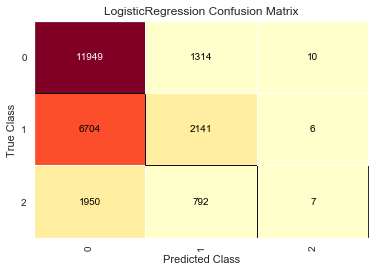

In [68]:
# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear', random_state=13)

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)




# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='micro'))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lr_clf, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [ ]:
y2

In [69]:
training  = pd.concat([X_train, y_train], axis=1)

training.columns

training.readmitted.value_counts()

no = training[training.readmitted==0]
over_30 = training[training.readmitted==1]
under_30 = training[training.readmitted==2]

print('no count: '+ str(len(no)))
print('over_30 count: '+ str(len(over_30)))
print('under_30 count: '+ str(len(under_30)))

In [82]:
# upsample minority
over_30_upsampled = resample(over_30,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(no),
                             random_state=23)  # reproducible results

In [83]:
# upsample minority
under_30_upsampled = resample(under_30,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=len(no),
                              random_state=23)  # reproducible results

In [87]:
upsampled = pd.concat([no, over_30_upsampled, under_30_upsampled])

upsampled.readmitted.value_counts()

2    40042
1    40042
0    40042
Name: readmitted, dtype: int64

In [ ]:
y2.value_counts()

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.4761789892654686
Test F1 score:  0.4761789892654686


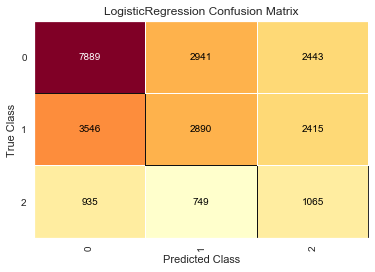

In [88]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.readmitted
X_train = upsampled.drop('readmitted', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred, average='micro'))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(upsampled_lr, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [89]:
no_downsampled = resample(no,
                          replace=False,  # sample without replacement
                          # match minority n
                          n_samples=len(over_30)+len(under_30),
                          random_state=23)  # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled, over_30, under_30])

# checking counts
downsampled.readmitted.value_counts()

C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test Accuracy score:  0.5671611787882442
Test F1 score:  0.5671611787882442


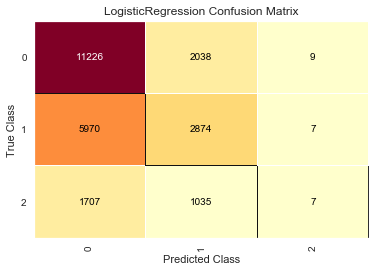

In [91]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred, average='micro'))

#checking confusion matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(downsampled_lr, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [93]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [39]:
y3 = y2.replace({2:1})

In [169]:
X2 = X.drop(columns = ['patient_nbr'])

Test Accuracy score:  0.5870994248151191


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


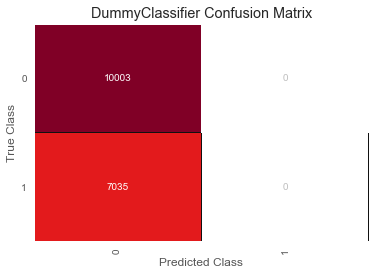

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=23)

dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))
print('Test F1 score: ', f1_score(y_test, dummy_pred))
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dummy, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

Test Accuracy score:  0.6234299800446061
Test F1 score:  0.34356455903417227


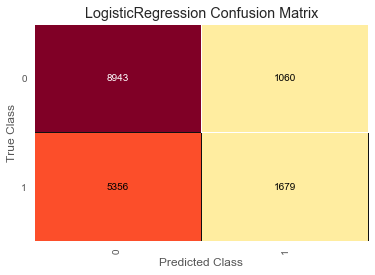

In [173]:
# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear', random_state=13)

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)




# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lr_clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [174]:
training  = pd.concat([X_train, y_train], axis=1)

training.columns

training.readmitted.value_counts()

no = training[training.readmitted==0]
yes = training[training.readmitted==1]

print('no count: '+ str(len(no)))
print('yes count: '+ str(len(yes)))

no count: 30180
yes count: 20932


In [175]:
# upsample minority
yes_upsampled = resample(yes,
                         replace=True,  # sample with replacement
                         # match number in majority class
                         n_samples=len(no),
                         random_state=23)  # reproducible results

In [176]:
upsampled = pd.concat([no, yes_upsampled])
upsampled.readmitted.value_counts()

1    30180
0    30180
Name: readmitted, dtype: int64

Test Accuracy score:  0.6040028172320695
Test F1 score:  0.5349782893376526


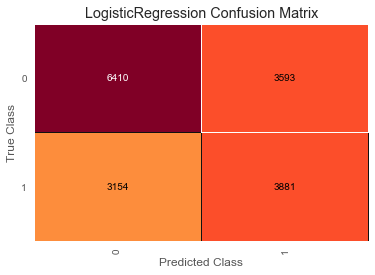

In [177]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.readmitted
X_train = upsampled.drop('readmitted', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(upsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [178]:
no_downsampled = resample(no,
                          replace=False,  # sample without replacement
                          # match minority n
                          n_samples=len(yes),
                          random_state=23)  # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled, yes])

# checking counts
downsampled.readmitted.value_counts()

1    20932
0    20932
Name: readmitted, dtype: int64

Test Accuracy score:  0.6039441248972884
Test F1 score:  0.5337847174243472


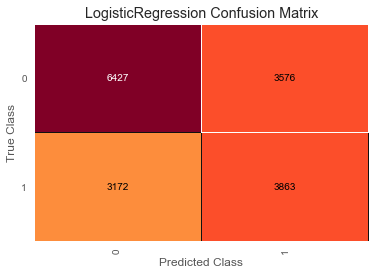

In [179]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

#checking confusion matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(downsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [83]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X2, y3, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

Test Accuracy score:  0.6099786917541109
Test F1 score:  0.5227999409710266


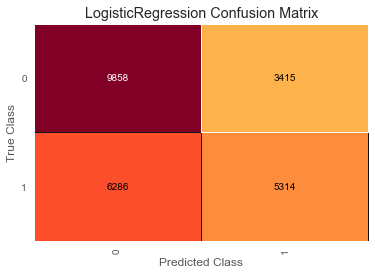

In [84]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(smote_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [158]:
def remove_repeats_deaths(X_val, y_val):
    """Removes repeated visits based on order. Removes
    patients discharged to hospice care or expired"""
    data = concat(X_val, y_val)
    data2 = data.sort_index()
    data3 = data2.loc[data2.duplicated(subset=['patient_nbr']) == False]
    discharge_list = [11, 13, 14, 19, 20, 21]
    data4 = data3.loc[data3.discharge_disposition_id.isin(discharge_list) == False]
    X_val_new, y_val_new = split_xy(data4)
    return X_val_new, y_val_new

In [166]:
def concat(X_val, y_val):
    """Concats given X and y datasets"""
    data = pd.concat([X_val, y_val], axis=1)
    return data

In [167]:
def split_xy(data):
    """Splits data along X and target"""
    X_val = data.drop(columns=['readmitted'])
    y_val = data.readmitted
    return X_val, y_val

In [168]:
X, y = remove_repeats_deaths(X, y)